<a href="https://colab.research.google.com/github/Siaan/gda_spr21/blob/main/geom_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Clustering

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

Generate N samples

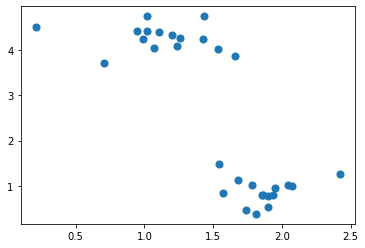

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=30, centers=2,
                       cluster_std=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Construct the NxN similarity matrix for the Gaussian graph, or we form the adjacency matrix to draw an edge between a node and its k nearest neighbours

In [ ]:
def k_nearest(array, i, k):
  k = k+1
  ind = np.argpartition(array, k)[:k] #returns the k closests points
  ind = np.delete(ind, np.where(ind == i))
  return ind[:k-1] #returns the indices of k closests points

In [ ]:
def k_neighbours(data, k):
  adj = []
  for i in range(0, len(data)):
    ind = k_nearest(data[i], i, k)
    ind = data[i][ind] #the k nearest nodes values
    idx = np.vectorize(lambda x: 1 if x in ind else 0) #only k 1's should be returned
    adj.append(np.vectorize(idx)(data[i]))
  return np.asarray(adj) #returns an adj matrix with k 1's in each row

Degree Matrix + Laplacian Matrix

In [ ]:
D = np.diag(np.sum(S, axis=1))
L = D-S

NameError: ignored

In [ ]:
from scipy.linalg import eigh
#e, v = eigh(L)

In [ ]:
v[:, :3].shape

In [ ]:
e.shape

In [ ]:
first_k_v = v[:, :1]
first_k_v.shape

In [ ]:
low_dim_data = first_k_v.T
first_k_v.T.shape #all 30 data points are in R^3 now

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def spectral_clustering(X, k, eig_num, m, graph_type, s=3):

  if graph_type == 'gaussian':
    pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))
    S = np.exp(-pairwise_sq_dists / s**2)   #similarity matrix
    W = S
  if graph_type == 'neighbours':
    S = pairwise_distances(X, metric='euclidean')
    W = k_neighbours(S, m)

  D = np.diag(1/np.sqrt(np.sum(W, axis=1)))
  L = np.eye(W.shape[0])-np.dot(np.dot(D,W),D)  #laplacian matrix
  #D = np.diag(np.sum(W, axis=1))
  #L = D - W
  #L = np.dot(L, np.linalg.inv(D))
  e, v = eigh(L)                                #eigvectors, eigenvalues
  first_k_v = v[:, :eig_num]                          #first eigenvalue
  low_dim_data = first_k_v              
  km = KMeans(n_clusters=k)
  km.fit(low_dim_data)
  labels = km.labels_

  return labels

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
def kmean_clusters(X, k, kmeans=True, rseed=3):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:k]
    centroid = X[i]

    #print(centroid)
    
    while True:
        labels = pairwise_distances_argmin(X, centroid)
        if kmeans:
          new_centroid = np.array([np.mean(X[labels == i],axis=0) for i in range(k)])
        else:
          new_centroid = np.array([np.median(X[labels == i],axis=0) for i in range(k)])
        
        if np.all(centroid == new_centroid):
            break
        centroid = new_centroid  
    return centroid, labels

In [ ]:
c, labels = spectral_clustering(X, 2, 'gaussian')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

# Question 4

Generate two concentric circles in R^2 and run k-means and spectral clustering with k = 2

In [ ]:
from sklearn.datasets.samples_generator import make_circles
def concentric_annuli(r1,r2, samples):
  X, labels = make_circles(n_samples=samples, noise=.05, factor=.5, random_state=0)
  plt.scatter(X[:,0], X[:,1])
  return X, labels

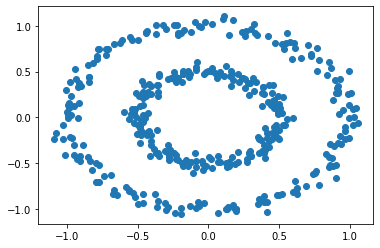

In [ ]:
circles, c_labels = concentric_annuli(1, 0.7, 400)

In [ ]:
circles.shape

(400, 2)

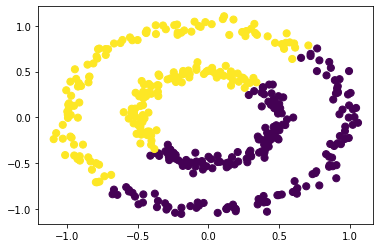

In [ ]:
c, labels = kmean_clusters(circles, 2)
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=50, cmap='viridis');

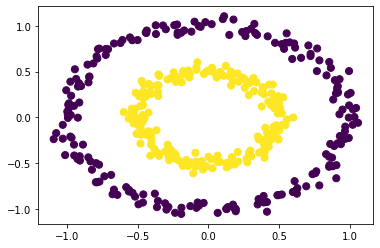

In [ ]:
labels = spectral_clustering(circles, 2,0, 'gaussian')
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=50, cmap='viridis');

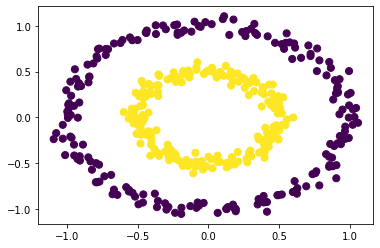

In [ ]:
lab = spectral_clustering(circles, 2, 1, 35, 'neighbours')
plt.scatter(circles[:, 0], circles[:, 1], c=lab, s=50, cmap='viridis');

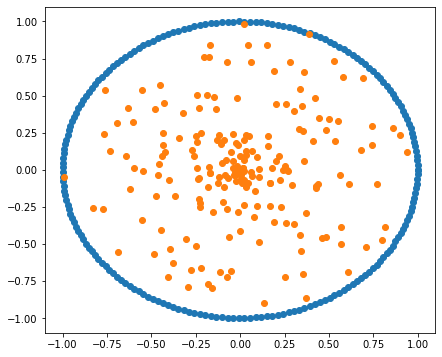

In [ ]:
num_samples = 200

# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

# generate the points
# theta = np.random.rand((num_samples)) * (2 * np.pi)
r = np.random.rand((num_samples))
x, y = r * np.cos(theta), r * np.sin(theta)

# plots
plt.figure(figsize=(7,6))
plt.scatter(a, b, linestyle='-', linewidth=1, label='Circle')
plt.scatter(x, y, marker='o', label='Samples')

In [ ]:
XY2 = list(zip(a,b))
XY2 = np.array(XY2)

In [ ]:
circles_3 = np.concatenate((XY, XY2), axis=0)


In [ ]:
circles_2.shape

(400, 2)

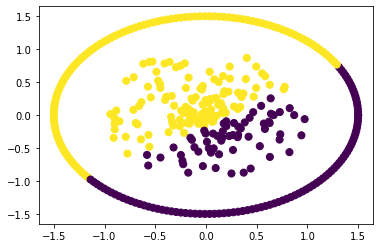

In [ ]:
c, labels = kmean_clusters(circles_2, 2)
plt.scatter(circles_2[:, 0], circles_2[:, 1], c=labels, s=50, cmap='viridis');

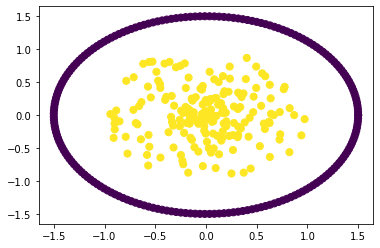

In [ ]:
labels = spectral_clustering(circles_2, 2, 0, 'gaussian')
plt.scatter(circles_2[:, 0], circles_2[:, 1], c=labels, s=50, cmap='viridis');

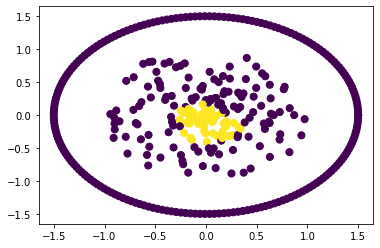

In [ ]:
labels = spectral_clustering(circles_2, 2, 1, 35,  'neighbours')
plt.scatter(circles_2[:, 0], circles_2[:, 1], c=labels, s=50, cmap='viridis');

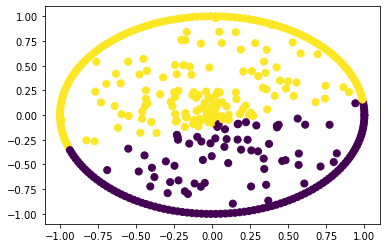

In [ ]:
c, labels = kmean_clusters(circles_3, 2)
plt.scatter(circles_3[:, 0], circles_3[:, 1], c=labels, s=50, cmap='viridis');

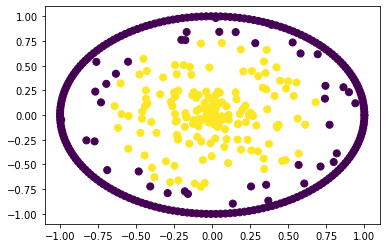

In [ ]:
labels = spectral_clustering(circles_3, 2,0, 'gaussian')
plt.scatter(circles_3[:, 0], circles_3[:, 1], c=labels, s=50, cmap='viridis');

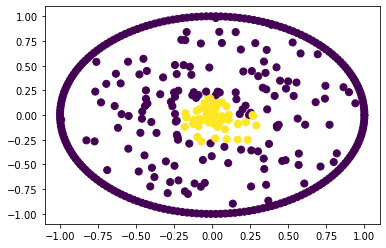

In [ ]:
lab = spectral_clustering(circles_3, 2,1, 35, 'neighbours')
plt.scatter(circles_3[:, 0], circles_3[:, 1], c=lab, s=50, cmap='viridis');

# Question 5

Run spectral clustering on given data set

In [ ]:
import pandas as pd
import re
df = pd.read_csv('ps1-data.txt')

In [ ]:
df.columns

Index(['Data'], dtype='object')

In [ ]:
input_data = []
for i in range(0, len(df['Data'])):
  s = np.asarray(re.split(r"\t", df['Data'][i]))
  input_data.append(list(map(float, s)))
input_data = np.asarray(input_data)

In [ ]:
input_data.shape

(300, 3)

Text(0.5, 1.0, 'Graph: gaussian, k = 2, first 3 eigenvectors used, m = None')

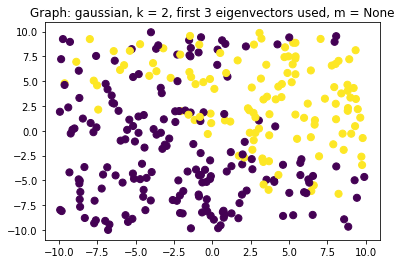

In [ ]:
graph_type = 'gaussian'
k = 2
eig_num = 3
m = None
labels = spectral_clustering(input_data, k, eig_num, m, graph_type)
plt.scatter(input_data[:, 0], input_data[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

IndexError: ignored

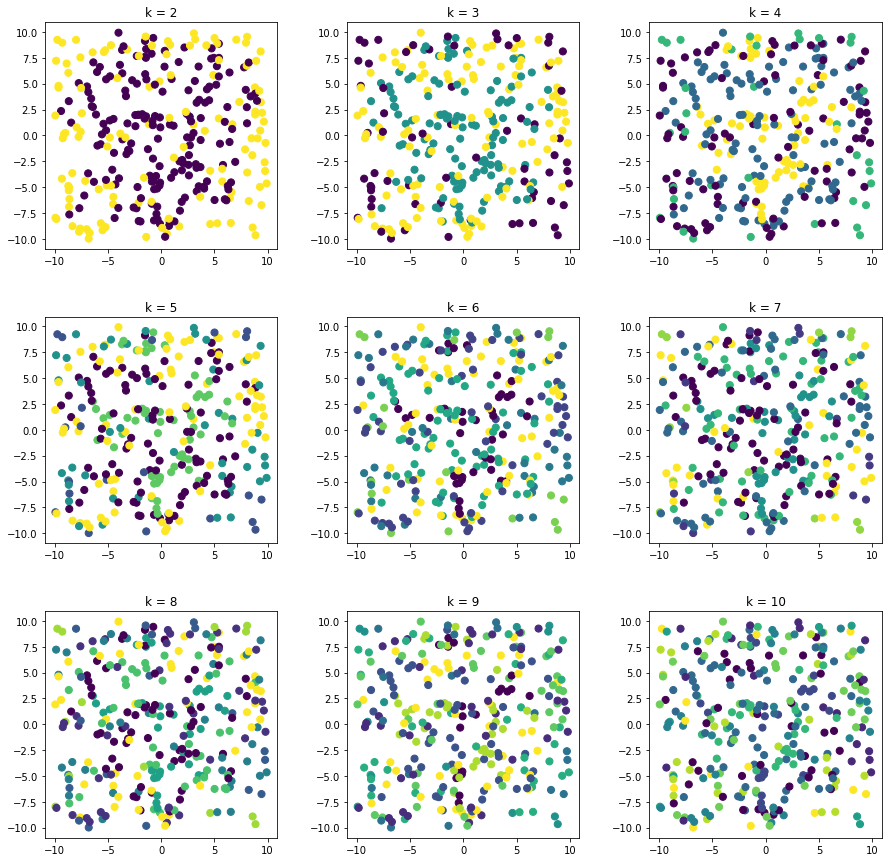

In [ ]:
trials = 10
fig, axs = plt.subplots(3,3, figsize=(15, 15), edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.3)

axs = axs.ravel()

k=2
for i in range(0, trials):
  labels = spectral_clustering(input_data, k,0, 'gaussian')
  axs[i].scatter(input_data[:, 0], input_data[:, 1], c=labels, s=50, cmap='viridis')
  axs[i].set_title("k = " +str(k))    
  k = k+1


Text(0.5, 0.92, 'k = 2')

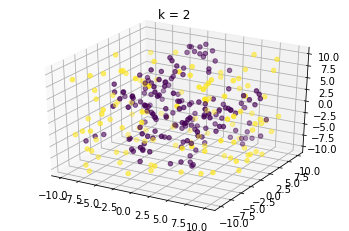

In [ ]:
from mpl_toolkits import mplot3d
labels = spectral_clustering(input_data, 2,0, 'gaussian')
#plt.scatter(input_data[:, 0], input_data[:, 1], c=labels, s=50, cmap='viridis');
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(2))

Text(0.5, 0.92, 'k = 3')

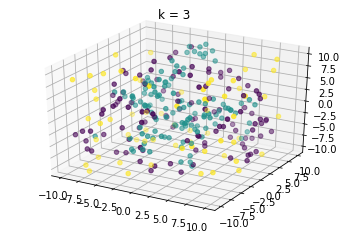

In [ ]:
labels = spectral_clustering(input_data, 3,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(3))

Text(0.5, 0.92, 'k = 4')

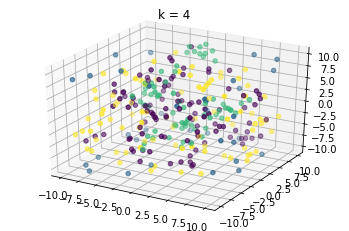

In [ ]:
labels = spectral_clustering(input_data, 4,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(4))

Text(0.5, 0.92, 'k = 5')

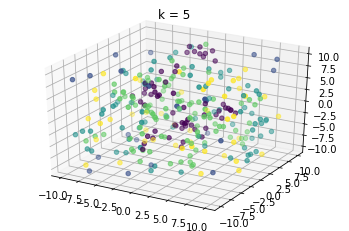

In [ ]:
labels = spectral_clustering(input_data, 5,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(5))

Text(0.5, 0.92, 'k = 6')

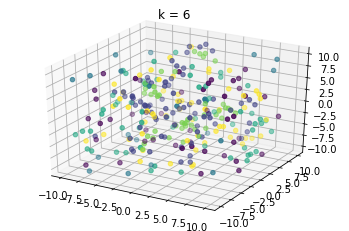

In [ ]:
labels = spectral_clustering(input_data, 6,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(6))

Text(0.5, 0.92, 'k = 7')

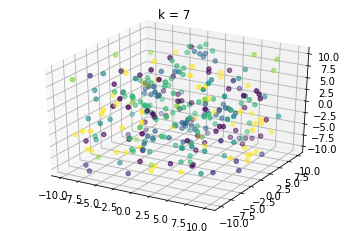

In [ ]:
labels = spectral_clustering(input_data, 7,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(7))

Text(0.5, 0.92, 'k = 8')

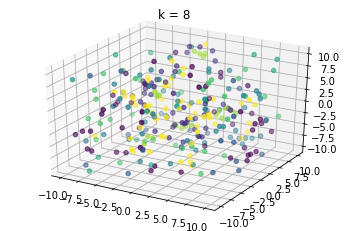

In [ ]:
labels = spectral_clustering(input_data, 8,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(8))

Text(0.5, 0.92, 'k = 9')

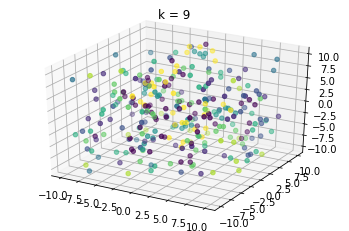

In [ ]:
labels = spectral_clustering(input_data, 9,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(9))

Text(0.5, 0.92, 'k = 10')

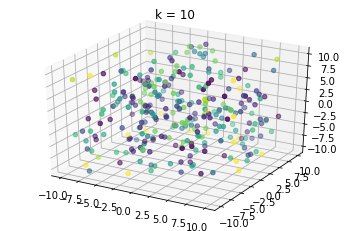

In [ ]:
labels = spectral_clustering(input_data, 10,0, 'gaussian')
ax = plt.axes(projection='3d')
ax.scatter3D(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=labels, cmap='viridis');
ax.set_title("k = " + str(10))

# Question 6

Comparing Gaussian weighted graph vs m-nearest neighbours graph performance

(1) Annuli examples:

In [ ]:
circles.shape

(400, 2)

Text(0.5, 1.0, 'Graph: gaussian, k = 2, first 2 eigenvectors used, m = None')

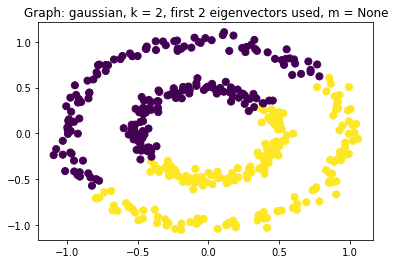

In [ ]:
k = 2
m = None
graph_type = 'gaussian'
eig_num = 2
labels = spectral_clustering(circles, k,eig_num, m, graph_type)
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

Text(0.5, 1.0, 'Graph: neighbours, k = 2, first 3 eigenvectors used, m = 5')

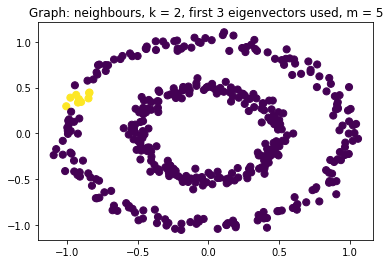

In [ ]:
k = 2
m = 5
graph_type = 'neighbours'
eig_num = 3
labels = spectral_clustering(circles, k,eig_num, m, graph_type)
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

Text(0.5, 1.0, 'Graph: neighbours, k = 2, first 1 eigenvectors used, m = 35')

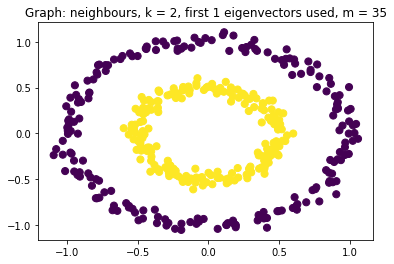

In [ ]:
k = 2
m = 35
graph_type = 'neighbours'
eig_num = 1
labels = spectral_clustering(circles, k,eig_num, m, graph_type)
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

Text(0.5, 1.0, 'k = 2, m = 35')

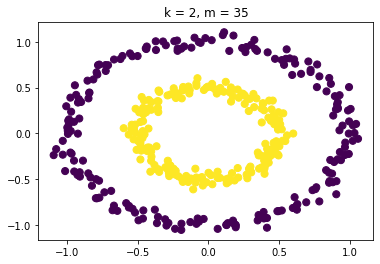

In [ ]:
m =35
labels = spectral_clustering(circles, 2,m, 'neighbours')
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=50, cmap='viridis');
plt.title("k = 2, m = "+str(m))

(2) Mixture of Gaussian models

In [ ]:
mean = np.array([1, 1])
cov = np.array([[1, 0], [0, 1]])
def sample_spherical_gaussian(dimension, num_gauss, means, variances, num_samples):
  x, y = np.random.multivariate_normal(means, variances, num_samples).T
  return x,y


In [ ]:
def create_dataset(trials, closeness, num_blobs=3):

  dataset = {}
  #each trial consists of 3 blobs that need to be clustered
  for i in range(0, trials):
    x = []
    y = [] 
    for j in range(0,num_blobs):
      mean = np.array([1, 1])* closeness[i][j]
      print("mean: " , mean)
      cov = np.array([[1, 0], [0, 1]])
      x2, y2 = sample_spherical_gaussian(2,2, mean, cov, 100)
      x = np.concatenate((x, x2), axis=0)
      y = np.concatenate((y, y2), axis=0)
      print(x.shape)

    XY = list(zip(x,y))
    XY = np.array(XY)

    print(XY.shape)
    dataset[i] = XY  
  plt.plot(x, y, 'x')
  return dataset


In [ ]:
x,y = sample_spherical_gaussian(2, 3, mean, cov, 200)

In [ ]:
plt.plot(x, y, 'x')

mean:  [10 10]
(100,)
mean:  [-7 -7]
(200,)
mean:  [2 2]
(300,)
(300, 2)
mean:  [2 2]
(100,)
mean:  [4 4]
(200,)
mean:  [3 3]
(300,)
(300, 2)
mean:  [1 1]
(100,)
mean:  [4 4]
(200,)
mean:  [6 6]
(300,)
(300, 2)


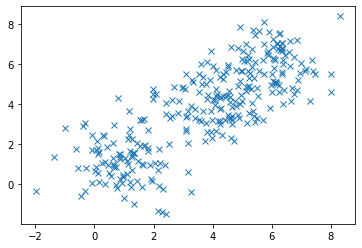

In [ ]:
dataset  = create_dataset(3, [[10, -7, 2], [2, 4, 3], [1, 4, 6]])

In [ ]:
dataset[0].shape

(300, 2)

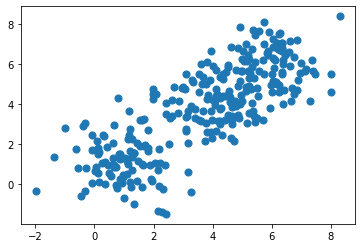

In [ ]:
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], s=50, cmap='viridis');

Text(0.5, 1.0, 'Graph: gaussian, k = 3, first 1 eigenvectors used')

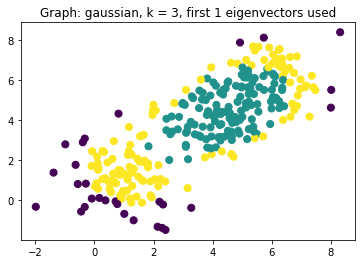

In [ ]:
k = 3
graph_type = 'gaussian'
eig_num = 1
labels = spectral_clustering(dataset[2], k,eig_num, 0, graph_type)
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used")

Text(0.5, 1.0, 'Graph: gaussian, k = 3, first 2 eigenvectors used')

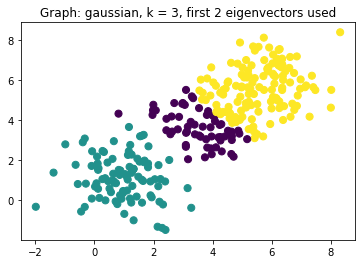

In [ ]:
k = 3
graph_type = 'gaussian'
eig_num = 2
labels = spectral_clustering(dataset[2], k,eig_num, 0, graph_type)
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used")

Text(0.5, 1.0, 'Graph: gaussian, k = 3, first 3 eigenvectors used')

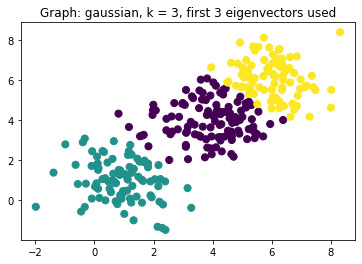

In [ ]:
 k = 3
graph_type = 'gaussian'
eig_num = 3
labels = spectral_clustering(dataset[2], k,eig_num, 0, graph_type)
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used")

Text(0.5, 1.0, 'Graph: neighbours, k = 3, first 3 eigenvectors used, m = 5')

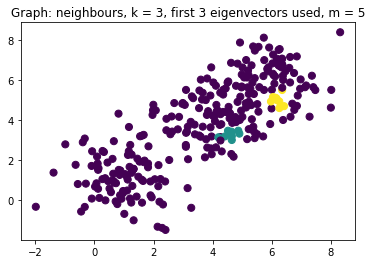

In [ ]:
k = 3
m = 5
graph_type = 'neighbours'
eig_num = 3
labels = spectral_clustering(dataset[2], k,eig_num, m, graph_type)
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

Text(0.5, 1.0, 'Graph: neighbours, k = 3, first 1 eigenvectors used, m = 35')

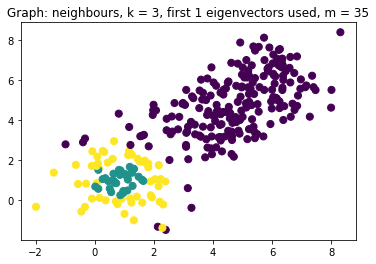

In [ ]:
k = 3
m = 35
graph_type = 'neighbours'
eig_num = 1
labels = spectral_clustering(dataset[2], k,eig_num, m, graph_type)
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

Text(0.5, 1.0, 'Graph: neighbours, k = 3, first 1 eigenvectors used, m = 35')

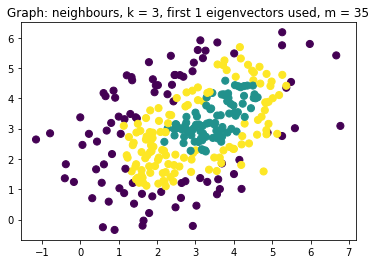

In [ ]:
#optional
k = 3
m = 35
graph_type = 'neighbours'
eig_num = 1
labels = spectral_clustering(dataset[1], k,eig_num, m, graph_type)
plt.scatter(dataset[1][:, 0], dataset[1][:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

Text(0.5, 1.0, 'Graph: neighbours, k = 3, first 3 eigenvectors used, m = 35')

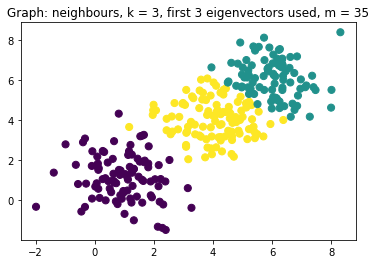

In [ ]:
k = 3
m = 35
graph_type = 'neighbours'
eig_num = 3
labels = spectral_clustering(dataset[2], k,eig_num, m, graph_type)
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], c=labels, s=50, cmap='viridis')
plt.title("Graph: "+ str(graph_type) + ", k = " +str(k) + ", first "+ str(eig_num) + " eigenvectors used, m = "+ str(m))

Text(0.5, 1.0, 'k = 3, m = 35')

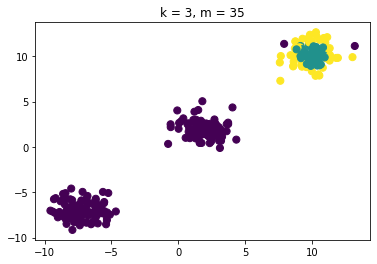

In [ ]:
k = 3
m = 35
labels = spectral_clustering(dataset[0], k,m, 'neighbours')
plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=labels, s=50, cmap='viridis');
plt.title("k = " + str(k) + ", m = "+str(m))

Text(0.5, 1.0, 'k = 3, m = 35')

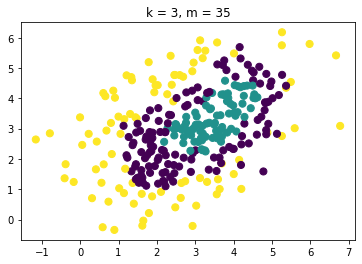

In [ ]:
k = 3
m =35
labels = spectral_clustering(dataset[1], k,m, 'neighbours')
plt.scatter(dataset[1][:, 0], dataset[1][:, 1], c=labels, s=50, cmap='viridis');
plt.title("k = " + str(k) + ", m = "+str(m))

Text(0.5, 1.0, 'k = 3, m = 35')

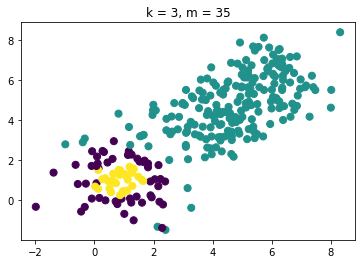

In [ ]:
k = 3
m =35
labels = spectral_clustering(dataset[2], k,m, 'neighbours')
plt.scatter(dataset[2][:, 0], dataset[2][:, 1], c=labels, s=50, cmap='viridis');
plt.title("k = " + str(k) + ", m = "+str(m))